In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

# Look at Original data

In [67]:
columns = ['DatabaseName', 'PatientNumber', 'ClientNumber', 'ConsultationNumber', 'ItemName', 'Units',
           'ItemLabel', 'ClinicCode', 'ConsultingVet', 'PatientDesexed', 'DeceasedDate',
           'VisitDate', 'ConsultationDate', 'ExaminationText' ,'PatientSpecies', 'PatientBreed',
           'PatientColour', 'PatientSex', 'PatientDoB', 'Insured', 'weight', 'temperature',
           'HeartRate', 'BodyScore', 'DentalGrade', 'RespRate', 'PainScore', 'BP', 'CRT', 'MMColour']

In [69]:
data_dir = "../../Data/vet_compass/"
data = pd.read_csv(data_dir + 'STR024A03 20190719 sample x10,000.csv', header=None, names = columns)

/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1,2,3,19,20,21,22,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [73]:
print('total number of records: ' + str(len(data)))
print('total number of cats:  ' + str(len(data['PatientNumber'].unique())))

total number of records: 722649
total number of cats:  10627


# Read cleaned data

In [2]:
cleaned_data = pd.read_csv("../../Data/vet_compass/processed_data.csv")  

/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2,3,4,20,21,22,24,25,26,27,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
print('total number of records: ' + str(len(cleaned_data)))
print('total number of cats:  ' + str(len(cleaned_data['PatientNumber'].unique())))

total number of records: 264025
total number of cats:  10508


In [3]:
cleaned_data.head()

,Unnamed: 0,DatabaseName,PatientNumber,ClientNumber,ConsultationNumber,ItemName,Units,ItemLabel,ClinicCode,ConsultingVet,PatientDesexed,DeceasedDate,VisitDate,ConsultationDate,ExaminationText,PatientSpecies,PatientBreed,PatientColour,PatientSex,PatientDoB,Insured,temperature,HeartRate,BodyScore,DentalGrade,RespRate,PainScore,BP,CRT,MMColour,weight_kg,UnifiedBreed,25%,50%,75%,weight_25%,weight_50%,weight_75%,UnifiedBodyScore,age,DentalGrade_str,DentalGrade_num,CleanHeartRate,medianHR,CleanRespRate,medianRR,creatinine,creatine kinase,usg,phosphate,protein,albumin,globulin,urine ph,triglyceride,calcium,calcium:phosphate,cholesterol,bun,sap,salt,glucose,tp,pcv,alp,alt,acp,alkp,bg,wbc,rcc,eos,baso,lymph,sodium,potassium,urea,ggt,ket,nit,leu
0,0,RxNSW,7138614,NaN,13869415,NaN,NaN,NaN,1.0,WA1,1.0,NaN,2012-07-05,2012-07-05,-------------------- Fees Charged: -----------...,Cat,Persian,White,Female,2010-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WesternEuropean,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,731.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,RxNSW,7737653,NaN,22925726,NaN,NaN,NaN,1.0,ZOU,1.0,NaN,2003-04-25,2003-04-25,NaN,Cat,Tonkinese,Lilac,Male,2002-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tonkinese,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,150.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,RxNSW,7738120,NaN,22934344,NaN,NaN,NaN,1.0,ZOU,1.0,NaN,2004-01-10,2004-01-10,NaN,Cat,Domestic Medium Hair,Tortoiseshell,Female,2003-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,330.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,RxNSW,7745004,NaN,23043653,NaN,NaN,NaN,1.0,ZOU,1.0,NaN,2013-02-18,2013-02-18,NaN,Cat,Siamese,Lilac Point,Male,2008-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asian,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,1674.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,RxNSW,7742894,NaN,23043708,NaN,NaN,NaN,1.0,ZOU,1.0,2013-11-05,2013-02-20,2013-02-20,Dental; Renal Dz,Cat,Domestic Long Hair,Ginger & White,Male,1994-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,6916.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Try to add Total T4 column

In [4]:
def make_regex(values):
    return f'({values})[\s\:\=\-]*(\d*\.?\/?\d*)'
# for protein\protien\protene\protine\... we need to look for +s instead of digits. like + prot... +

def add_column(df, values, colname):
    df[colname] = df.ExaminationText.str.extract(make_regex(values), expand=True, flags=re.IGNORECASE)[1]
    return df

In [5]:
colname = 'Total T4'
values = 'Total T4|TOTAL T4|T4'

In [6]:
cleaned_data = add_column(cleaned_data, values, colname)
print('\x1b[32m' + str(len(cleaned_data[colname].unique())) + " unique values found for " + colname + '\x1b[0m')

223 unique values found for Total T4


In [7]:
# force to numeric
cleaned_data[colname] = pd.to_numeric(cleaned_data[colname], errors='coerce')
print(len(cleaned_data))

722649


In [8]:
cols_to_keep = ['DatabaseName', 'PatientNumber', 'ConsultationNumber', 'ConsultingVet', 'PatientDesexed', 'DeceasedDate', 'VisitDate',
       'ConsultationDate', 'ExaminationText', 'PatientSpecies', 'PatientBreed',
       'PatientColour', 'PatientSex', 'PatientDoB', 'Insured', 'temperature',
       'HeartRate', 'BodyScore', 'DentalGrade', 'RespRate', 'PainScore', 'BP',
       'CRT', 'MMColour', 'weight_kg', 'UnifiedBreed', '25%', '50%', '75%',
       'weight_25%', 'weight_50%', 'weight_75%', 'UnifiedBodyScore', 'age',
       'DentalGrade_str', 'DentalGrade_num', 'CleanHeartRate', 'medianHR',
       'CleanRespRate', 'medianRR', 'creatinine', 'creatine kinase', 'usg',
       'phosphate', 'protein', 'albumin', 'globulin', 'urine ph',
       'triglyceride', 'calcium', 'calcium:phosphate', 'cholesterol', 'bun',
       'sap', 'salt', 'glucose', 'tp', 'pcv', 'alp', 'alt', 'acp', 'alkp',
       'bg', 'wbc', 'rcc', 'eos', 'baso', 'lymph', 'sodium', 'potassium',
       'urea', 'ggt', 'ket', 'nit', 'leu', 'Total T4']

In [9]:
# keep only relevent columns and drop duplicates
cleaned_data = cleaned_data[cols_to_keep]
cleaned_data = cleaned_data.drop_duplicates()
print(len(cleaned_data))

264025


In [10]:
len(cleaned_data['PatientNumber'].unique())

10508

In [11]:
cleaned_data[colname].unique()

array([      nan, 0.000e+00, 1.000e-01, 1.240e+02, 3.000e+00, 3.700e+01,
       2.300e+01, 1.930e+02, 4.600e+01, 8.300e+01, 2.200e+01, 2.800e+01,
       2.100e+01, 4.000e+01, 1.800e+01, 2.000e+01, 3.200e+01, 8.000e+00,
       5.000e+01, 3.500e+01, 2.400e+01, 1.500e+01, 2.900e+01, 2.600e+01,
       4.100e+01, 3.100e+01, 1.790e+02, 1.538e+02, 7.200e+01, 1.550e+02,
       1.000e+00, 4.700e+01, 5.500e+01, 1.100e+01, 6.000e+01, 5.600e+01,
       3.600e+01, 3.800e+01, 1.030e+02, 2.000e+00, 6.900e+01, 1.200e+01,
       2.000e-01, 3.900e+01, 4.800e+01, 6.300e+01, 1.350e+02, 7.560e+01,
       1.150e+02, 1.870e+02, 2.500e+01, 1.600e+02, 3.300e+01, 5.920e+01,
       4.890e+01, 5.150e+01, 2.960e+01, 3.090e+01, 4.120e+01, 1.500e-01,
       1.600e+01, 7.900e+01, 9.000e+01, 4.300e+01, 5.200e+01, 7.000e+00,
       1.900e+01, 4.900e+01, 2.700e+01, 5.900e+01, 4.770e+01, 3.400e+01,
       5.800e+01, 2.080e+01, 9.000e-01, 4.400e+01, 3.000e+01, 1.000e+01,
       3.000e-01, 1.400e+01, 8.600e+01, 4.500e+01, 

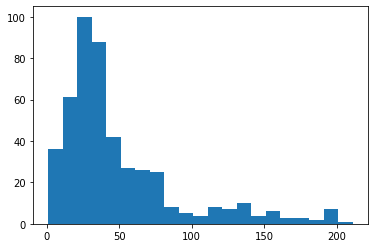

In [12]:
_=plt.hist(cleaned_data['Total T4'].dropna(), bins=np.arange(1,220,10))

some values in examination text

Total T4 (Thyroxine) 35.1 11.0 - 46.0 nmol/L 
Total T4 24 nmol/L (6-52)

# Make data frames for cases and controls

In [13]:
cats_hyperthyroid = cleaned_data[cleaned_data['Total T4'] > 65.0]['PatientNumber'].unique()

In [14]:
len(cats_hyperthyroid)

88

In [15]:
cats_control = cleaned_data[cleaned_data['Total T4'] < 65.0]['PatientNumber'].unique()

In [16]:
len(cats_control)

283

# Make Controls

In [60]:
df_cats_hyperthyroid = cleaned_data[cleaned_data['PatientNumber'].isin(cats_hyperthyroid)]
print('Cases num cats: ' + str(len(cats_hyperthyroid)))
print('Cases num records:  ' + str(len(df_cats_hyperthyroid)))

Cases num cats: 88
Cases num records:  7289


In [61]:
blood_cols = ['creatinine', 'creatine kinase', 'usg',
       'phosphate', 'protein', 'albumin', 'globulin', 'urine ph',
       'triglyceride', 'calcium', 'calcium:phosphate', 'cholesterol', 'bun',
       'sap', 'salt', 'glucose', 'tp', 'pcv', 'alp', 'alt', 'acp', 'alkp',
       'bg', 'wbc', 'rcc', 'eos', 'baso', 'lymph', 'sodium', 'potassium',
       'urea', 'ggt', 'ket', 'nit', 'leu', 'Total T4']

In [62]:
# drop rows which don't have at least thresh (1) number of blood_cols that aren't nan
# make a list of the indices left
index_list = list(df_cats_hyperthyroid[blood_cols].dropna(thresh = 1).index)

In [63]:
df_cats_hyperthyroid = df_cats_hyperthyroid.ix[index_list]

/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [64]:
print('After keeping only records with at least 1 blood value:')
print('Cases num cats: ' + str(len(df_cats_hyperthyroid['PatientNumber'].unique())))
print('Cases num records:  ' + str(len(df_cats_hyperthyroid)))
print()
print('After keeping only records with at least 2 blood value:')
print('Cases num cats: 80' )
print('Cases num records:  257')
print()
print('After keeping only records with at least 3 blood value:')
print('Cases num cats: 64' )
print('Cases num records:  151')

After keeping only records with at least 1 blood value:
Cases num cats: 88
Cases num records:  424

After keeping only records with at least 2 blood value:
Cases num cats: 80
Cases num records:  257

After keeping only records with at least 3 blood value:
Cases num cats: 64
Cases num records:  151


In [53]:
df_cats_hyperthyroid.sort_values(by=['PatientNumber', 'VisitDate'])

,DatabaseName,PatientNumber,ConsultationNumber,ConsultingVet,PatientDesexed,DeceasedDate,VisitDate,ConsultationDate,ExaminationText,PatientSpecies,PatientBreed,PatientColour,PatientSex,PatientDoB,Insured,temperature,HeartRate,BodyScore,DentalGrade,RespRate,PainScore,BP,CRT,MMColour,weight_kg,UnifiedBreed,25%,50%,75%,weight_25%,weight_50%,weight_75%,UnifiedBodyScore,age,DentalGrade_str,DentalGrade_num,CleanHeartRate,medianHR,CleanRespRate,medianRR,creatinine,creatine kinase,usg,phosphate,protein,albumin,globulin,urine ph,triglyceride,calcium,calcium:phosphate,cholesterol,bun,sap,salt,glucose,tp,pcv,alp,alt,acp,alkp,bg,wbc,rcc,eos,baso,lymph,sodium,potassium,urea,ggt,ket,nit,leu,Total T4
215929,RxQLD,130386,17749288,WT4,1.0,NaN,2015-02-18,2015-02-18,Reason: Gass Down Look At Feet Appointment Not...,Cat,Domestic Short Hair,Black & White,Male,2005-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.990,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,3376.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,1.055,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216040,RxQLD,130386,18064422,MV1,1.0,NaN,2015-03-16,2015-03-16,Reason: I 131 Appointment Notes: confirmed app...,Cat,Domestic Short Hair,Black & White,Male,2005-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,3402.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.03,NaN,NaN,NaN,NaN,NaN,74.4
216206,RxQLD,130386,18155615,RRM,1.0,NaN,2015-05-06,2015-05-06,Reason: Recheck; Gas For Bloods History: Has b...,Cat,Domestic Short Hair,Black & White,Male,2005-11-21,NaN,38.2,98,6/9,0,hissing,NaN,NaN,2,pk,8.050,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,0.666667,3453.0,0,0.0,98.0,160.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN
217341,RxQLD,130386,19006279,RRM,1.0,NaN,2016-03-10,2016-03-10,Reason: vacc History: Eddu well happy/active n...,Cat,Domestic Short Hair,Black & White,Male,2005-11-21,NaN,38.3,160,7,1,32,NaN,NaN,2,pk,8.950,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,0.777778,3762.0,1,1.0,160.0,160.0,32.0,40.0,139.00,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,10.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0
219773,RxQLD,130386,19837470,SM9,1.0,NaN,2017-05-24,2017-05-24,Reason: D/o Consult (NEEDS TO BE GASSED!!!!!) ...,Cat,Domestic Short Hair,Black & White,Male,2005-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.260,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,4202.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224384,RxQLD,130386,20669715,SM9,1.0,NaN,2018-08-01,2018-08-01,Reason: Gas For Health Check; Vacc; Bloods; Ur...,Cat,Domestic Short Hair,Black & White,Male,2005-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.600,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,4636.0,NaN,NaN,168.0,160.0,30.0,40.0,101.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3,NaN,NaN,NaN,NaN,NaN
207696,RxQLD,797129,3816739,SUP,0.0,NaN,2005-09-02,2005-09-02,Straining s - straining to urinate for last fe...,Cat,Domestic Short Hair,GINGER,Male,2000-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Domestic,3.5775,4.6,5.4,3.5775,4.6,5.4,NaN,1963.0,NaN,NaN,168.0,160.0,30.0,40.0,NaN,NaN,NaN,7.50,NaN,NaN,NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517970,RxVIC,797129,3816739,SUP,1.0,2017-09-20,2005-09-02,2005-09-02,Straining s - straining to urinate for last fe...,Cat,Domestic Short Hair,GINGER,Male,2000-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Domestic,3.5775,4.6,5.4,3.5775

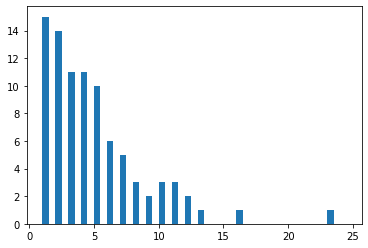

In [38]:
# Get number of unique CONSULTATIONS per cat
consults = df_cats_hyperthyroid.groupby(['PatientNumber'])['ConsultationNumber'].nunique()
consults_dict = consults.to_dict()
_=plt.hist(consults, bins=np.arange(1,25,0.5))

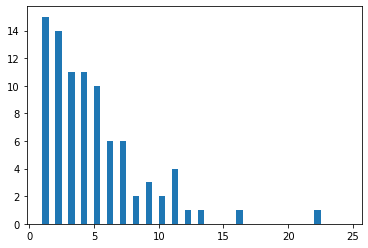

In [42]:
# Get number of unique DATES that a cat has a record for
dates = df_cats_hyperthyroid.groupby(['PatientNumber'])['VisitDate'].nunique()
dates_dict = dates.to_dict()
_=plt.hist(dates, bins=np.arange(1,25,0.5))

In [43]:
# Add number of unique consults and number of unique visit dates to dataframe

def set_value(column_value, dictionary):
        return dictionary[column_value]
        
df_cats_hyperthyroid['num visit dates'] = df_cats_hyperthyroid.apply(lambda x: set_value(x['PatientNumber'], dates_dict),axis=1)
df_cats_hyperthyroid['num consults'] = df_cats_hyperthyroid.apply(lambda x: set_value(x['PatientNumber'], consults_dict),axis=1)

In [45]:
# There are 4 cats with more consults than visit dates (e.g. 2 visits in the same day)
df_cats_hyperthyroid[df_cats_hyperthyroid['num consults'] > df_cats_hyperthyroid['num visit dates']]['PatientNumber'].unique()

array([130386, 7137272, 7220010, 7520937], dtype=object)

In [46]:
# Look at some demographics of cases

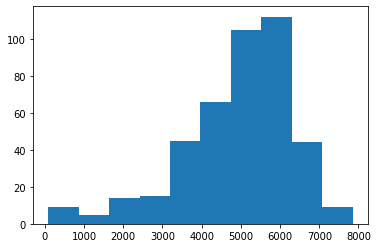

In [47]:
_=plt.hist(df_cats_hyperthyroid['age']) #', bins=np.arange(1,25,0.5))